#### Visualizing global sensitivity analysis

In [16]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from SALib.analyze import sobol

In [11]:
variables = {
    'num_vars' : 5,
    'names': ['bias', 'mu_p_upvote', 'mu_p_active','std_p_ask', 'std_p_answer'],
    'bounds': [[1, 40], [0, 1], [0, 1], [0.01, 1], [0.01, 1]]}

In [3]:
df1 = pd.read_csv('data/global_sa_0.csv')
df2 = pd.read_csv('data/global_sa_1.csv')
df3 = pd.read_csv('data/global_sa_2.csv')
df4 = pd.read_csv('data/global_sa_3.csv')
df5 = pd.read_csv('data/global_sa_4.csv')
df6 = pd.read_csv('data/global_sa_5.csv')
df7 = pd.read_csv('data/global_sa_6.csv')
df8 = pd.read_csv('data/global_sa_7.csv')

df_total = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])

In [41]:
Si_upvotes = sobol.analyze(variables, df_total['coeff_upvotes'].values, calc_second_order=False)
Si_reputation = sobol.analyze(variables, df_total['coeff_reputation'].values, calc_second_order=False)
Si_questions = sobol.analyze(variables, df_total['n_questions'].values, calc_second_order=False)
Si_answers = sobol.analyze(variables, df_total['n_answers'].values, calc_second_order=False)

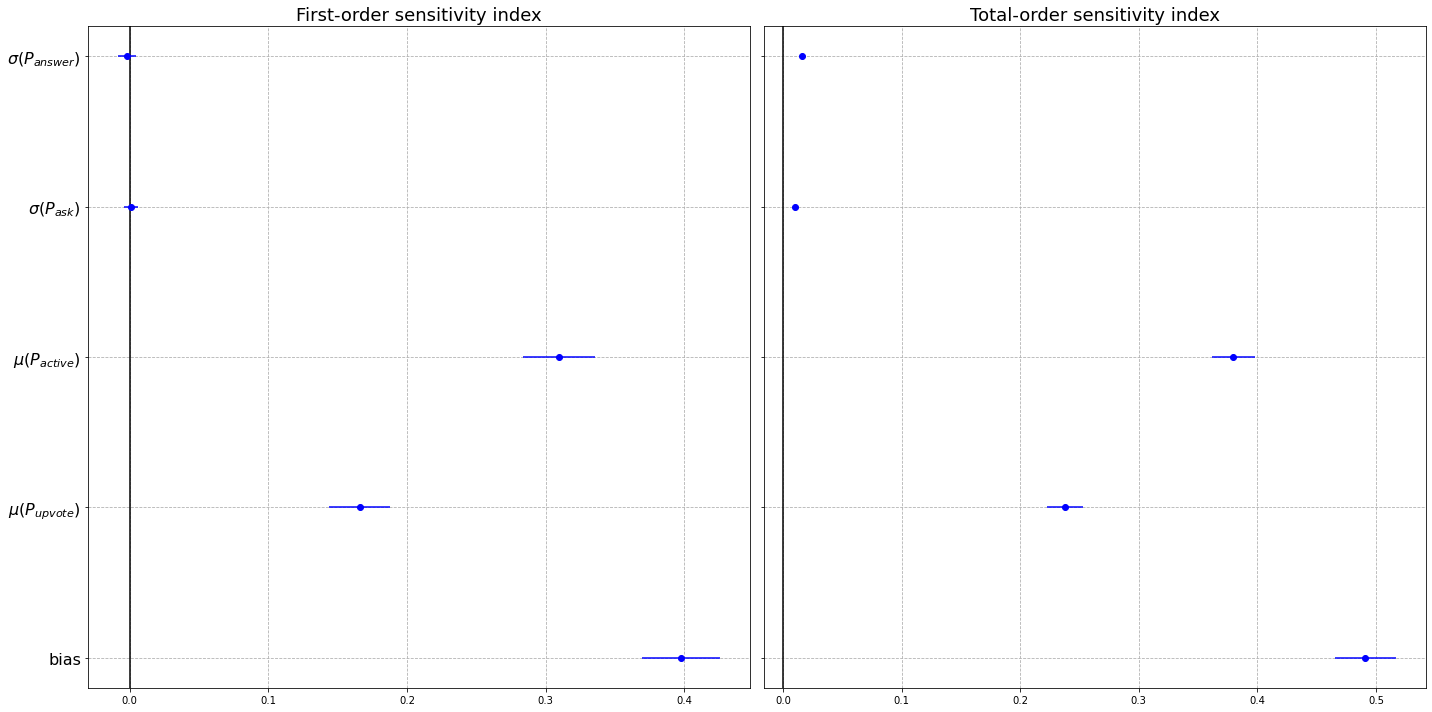

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

indices = Si_upvotes['S' + '1']
errors = Si_upvotes['S' + '1' + '_conf']
l = len(indices)
axs[0].errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o', color = 'blue')
axs[0].set_yticks(range(l), ['$\sigma(P_{answer})$', '$\sigma(P_{ask})$', '$\mu(P_{active})$', '$\mu(P_{upvote})$', 'bias'][::-1], fontsize=16)
axs[0].set_ylim([-0.2, len(indices) - 1 + 0.2])

indices = Si_upvotes['S' + 'T']
errors = Si_upvotes['S' + 'T' + '_conf']
l = len(indices)
axs[1].errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o', color = 'blue')
axs[1].set_ylim([-0.2, len(indices) - 1 + 0.2])

for ax in axs:
    ax.axvline(0, c='k')
    ax.grid(True, linestyle='dashed')

axs[0].set_title('First-order sensitivity index', fontsize = 18)
axs[1].set_title('Total-order sensitivity index', fontsize = 18)

plt.tight_layout()
plt.savefig('global_sa.pdf')
plt.show()